# Lab 2: Benchmarking Binary Heaps

> Date: 09/27/2024
> Author: Leigh Goetsch
> Class: CSC3310
>
> ### Learning Outcomes
>
> - Implement a binary heap in Python
> - Benchmark the performance of a binary heap
> - Analyze the performance of a binary heap

## Introduction

This lab focuses on benchmarking the performance of a binary heap. The goal is to compare the performance of operations from the heapq library to gain a better understanding of the efficiency of a binary heap.


## Design Benchmarks

Plan out how you intend to benchmark the following operations:


### heapify

Create a heap from a collection. Note that this is not the same procedure as min-heapify but rather the build min heap procedure.


In [2]:
def min_heapify(input_list, i, n):
    """
    Function takes a list and an index and returns a min heapified list.
    """
    left = 2*(i + 1) - 1
    right = 2*(i + 1)
    smallest = i
    if left < n and input_list[left] < input_list[smallest]:
        smallest = left
    if right < n and input_list[right] < input_list[smallest]:
        smallest = right
    if smallest != i:
        input_list[i], input_list[smallest] = input_list[smallest], input_list[i]
        min_heapify(input_list, smallest, n)


def heapify(input_list):
    """
    Function takes a list and returns a heapified list.
    """
    n = len(input_list)
    for i in range(n//2 - 1, -1, -1):
        min_heapify(input_list, i, n)
    return input_list

### heappush

Push an element to the heap and restore the heap property if necessary.


In [3]:
def heappush(heap, item):
    """
    Function takes a heap and an item and returns a heap with the item added.
    """
    # add the item to the end of the heap
    heap.append(item)

    # restore the heap property
    i = len(heap)
    while i > 1:
        if heap[i-1] < heap[i//2 -1]:
            heap[i//2 -1], heap[i -1] = heap[i -1], heap[i//2 -1]
        i = i//2
    return heap

### create_heap_one_by_one

Implement a function that creates a heap by adding each element one by one, i.e. invoke heappush n times for n elements.


In [4]:
def create_heap_one_by_one(input_list):
    """
    Function takes a list and returns a heapified list.
    """
    heap = []
    for item in input_list:
        heap = heappush(heap, item)
    return heap

### heappop

pop and return the smallest item from the heap, maintaining the heap invariant.


In [5]:
def heappop(heap:list):
    """
    Function takes a heap and returns the smallest element.
    """
    n = len(heap)
    if n < 1:
        raise ValueError('heap underflow')
    heap[0], heap[-1] = heap[-1], heap[0]
    min = heap.pop()
    min_heapify(heap, 0, n-1)
    return min

### heapsort

sort a list of numbers using the heapsort algorithm.


In [6]:
def heap_sort(input_list):
    """
    Function takes a list and returns a sorted list.
    """
    heap = heapify(input_list)
    sorted_list = []
    while len(heap) > 0:
        min_val = heappop(heap)
        sorted_list.append(min_val)
    return sorted_list

### Test Functions

In [7]:
import random

input_lists = [random.sample(range(n), n) for n in range(4, 50, 5)]

# is the heap correct
def test_heap(heap):
    # check if each parent is smaller than its children
    # and if the heap property is satisfied
    n = len(heap)
    for i in range(1, n//2):
        left = 2*i
        right = 2*i + 1
        if left < n:
            # print(f"i: ({i}, {heap[i-1]})\nleft: ({left}, {heap[left-1]})\nright: ({right}, {heap[right-1]})")
            assert heap[left - 1] >= heap[i -
                                          1], f"failed left at index {i}:{heap}"
        if right < n:
            assert heap[right - 1] >= heap[i -
                                           1], f"failed right at index {i}:{heap}"



In [8]:

print("Test heapify (min heap) ----------------------------")
for input_list in input_lists:
    heap = heapify(input_list.copy())
    test_heap(heap)


print("Test heappush --------------------------------------")
def test_heappush(heap, item):
    heap = heap.copy()
    heap = heappush(heap, item)
    assert heap[0] == min(heap), f"failed heappush:{heap}, {item}"
    test_heap(heap)

heap = heapify([8, 9, 2, 5, 4])
test_heaps = [
    (heap, 6),
    (heap, 0),
    (heap, 3),
    (heap, 1),
    (heap, 10),
]

for heap, item in test_heaps:
    test_heappush(heap, item)

print("Test create heap one by one ------------------------")
# Test Create Heap One By One
for input_list in input_lists:
    heap = create_heap_one_by_one(input_list)
    test_heap(heap)

print(f"Test heappop ---------------------------------------")
# Test heappop
for input_list in input_lists:
    heap = heapify(input_list.copy())
    result = heappop(heap.copy())
    assert result == min(heap), f"failed heappop:{heap}, {result, min(heap)}"
    test_heap(heap)

print("Test heapsort --------------------------------------")
# Test heapsort
for input_list in input_lists:
    result = heap_sort(input_list.copy())
    input_list.sort()
    assert result == input_list, f"failed heapsort:\n\tresult: {result}\n\tcorrect answer: {input_list}"

Test heapify (min heap) ----------------------------
Test heappush --------------------------------------
Test create heap one by one ------------------------
Test heappop ---------------------------------------
Test heapsort --------------------------------------


### Benchmark Functions


In [9]:
import time


def benchmark_heapify(input_list):
    input_list = input_list.copy()
    start_time = time.perf_counter()
    heapify(input_list)
    end_time = time.perf_counter()
    elapsed = end_time - start_time
    return elapsed


def benchmark_heappush(heap, item):
    heap = heap.copy()
    start_time = time.perf_counter()
    heappush(heap, item)
    end_time = time.perf_counter()
    elapsed = end_time - start_time
    return elapsed


def benchmark_create_heap(input_list):
    input_list = input_list.copy()
    start_time = time.perf_counter()
    create_heap_one_by_one(input_list)
    end_time = time.perf_counter()
    elapsed = end_time - start_time
    return elapsed


def benchmark_heappop(heap):
    heap = heap.copy()
    start_time = time.perf_counter()
    heappop(heap)
    end_time = time.perf_counter()
    elapsed = end_time - start_time
    return elapsed


def benchmark_heap_sort(input_list):
    input_list = input_list.copy()
    start_time = time.perf_counter()
    heap_sort(input_list)
    end_time = time.perf_counter()
    elapsed = end_time - start_time
    return elapsed

## Perform Benchmarks

Implement and run the benchmarks


In [10]:
# set up benchmarking lists
import random

heap_sizes = [100, 500, 1000, 5000, 10000, 25000]
benchmark_lists = {
    "best": [list(range(n)) for n in heap_sizes],
    "worst": [list(range(n, 0, -1)) for n in heap_sizes],
    "average": [random.sample(range(n), n) for n in heap_sizes]
}

results = {
    "heapify": {k: [] for k in benchmark_lists},
    "heappush": {k: [] for k in benchmark_lists},
    "create_heap": {k: [] for k in benchmark_lists},
    "heappop": {k: [] for k in benchmark_lists},
    "heap_sort": {k: [] for k in benchmark_lists}
}

### Run Benchmarks

In [11]:
for key in benchmark_lists:
    for input_list in benchmark_lists[key]:
        results["heapify"][key].append(benchmark_heapify(input_list))
        results["create_heap"][key].append(benchmark_create_heap(input_list))
        results["heap_sort"][key].append(benchmark_heap_sort(input_list))
        heap = heapify(input_list)
        results["heappush"][key].append(benchmark_heappush(heap, 0))
        results["heappop"][key].append(benchmark_heappop(heap))

## Validating Formal Run Times

Using functions from lab 1 to estimate the big-o complexity for each of the heapq operations.


In [12]:
import numpy as np
from scipy.stats import linregress

# fit a linear regression model to the log of the list
# sizes (s) and run times (r) to estimate the slope (m)
# log r = m log s + b


def estimate_slope(list_sizes, run_times):
    '''
    Function takes a list of list sizes and a list of run times
    and returns the slope of the linear regression model.
    '''
    m, b, _, _, _ = linregress(np.log(list_sizes), np.log(run_times))
    return m


def get_complexity(m):
    '''
    Function takes the slope of the linear regression model
    and returns the complexity of the algorithm.
    '''
    if m == 0:
        return "Constant"
    elif m < 1:
        return "Sub-linear (e.g., log n)"
    elif m == 1:
        return "Linear"
    elif m > 1 and m < 2:
        return "Between linear and quadratic (e.g., n log n)"
    elif m == 2:
        return "Quadratic (e.g., n^2)"
    elif m > 2 and m < 3:
        return "Between quadratic and cubic (e.g., n^2 log n)"
    elif m == 3:
        return "Cubic (e.g., n^3)"
    else:
        return "Out of Scope"

In [13]:
# Validate the the formal run time complexity of the algorithms
for function, result in results.items():
    print(f"Algorithm: {function}")
    for case, run_times in result.items():
        m = estimate_slope(heap_sizes, run_times)
        complexity = get_complexity(m)
        print(f"Case: {case}")
        print(f"Estimated Slope: {m}")
        print(f"Complexity: {complexity}")
        print()

Algorithm: heapify
Case: best
Estimated Slope: 0.9926166576897931
Complexity: Sub-linear (e.g., log n)

Case: worst
Estimated Slope: 1.0656593012543947
Complexity: Between linear and quadratic (e.g., n log n)

Case: average
Estimated Slope: 1.0931350200547276
Complexity: Between linear and quadratic (e.g., n log n)

Algorithm: heappush
Case: best
Estimated Slope: 0.32780615711939615
Complexity: Sub-linear (e.g., log n)

Case: worst
Estimated Slope: 0.48025393672235317
Complexity: Sub-linear (e.g., log n)

Case: average
Estimated Slope: 0.5126586198009434
Complexity: Sub-linear (e.g., log n)

Algorithm: create_heap
Case: best
Estimated Slope: 1.1622490499709706
Complexity: Between linear and quadratic (e.g., n log n)

Case: worst
Estimated Slope: 1.244889737675324
Complexity: Between linear and quadratic (e.g., n log n)

Case: average
Estimated Slope: 1.2800962654026222
Complexity: Between linear and quadratic (e.g., n log n)

Algorithm: heappop
Case: best
Estimated Slope: 0.15967261548

## Visualizing Results

Plotting...


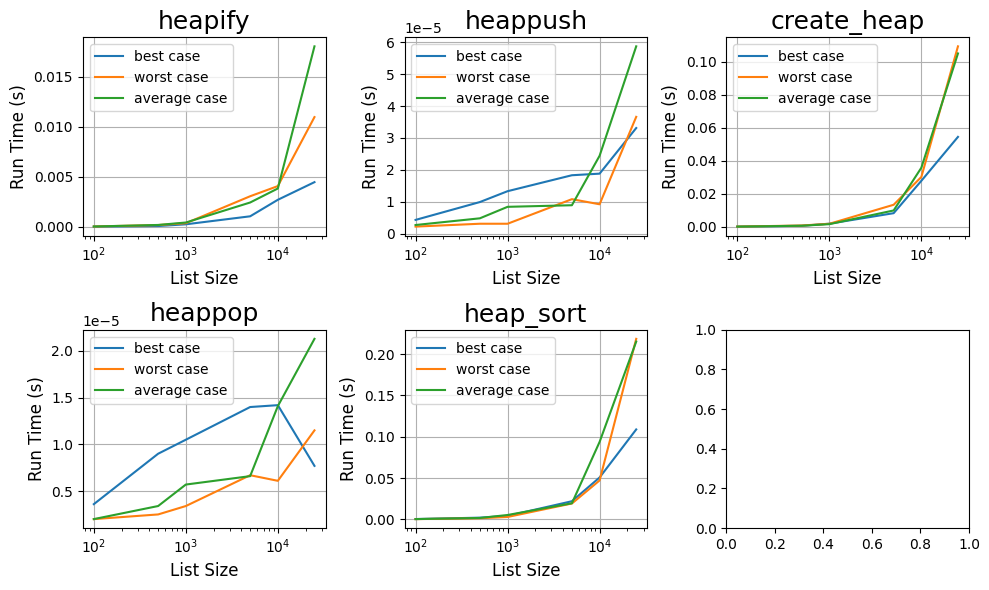

In [14]:
import matplotlib.pyplot as plt
print("Plotting...")
cols = 3
rows = len(results.keys())//cols + 1

plt.subplots(rows, cols, figsize=(10, 6))
# plot by algorithm
for i, (func, result) in enumerate(results.items()):
    plt.subplot(rows, cols, i + 1)
    plt.grid(True)
    plt.xscale("log")
    plt.xlabel("List Size", fontsize=12)
    plt.ylabel("Run Time (s)", fontsize=12)
    plt.title(f"{func}", fontsize=18)
    for case, times in result.items():
        plt.plot(heap_sizes, times, label=f"{case} case")
    plt.legend()
plt.tight_layout()

## Reflection Questions

1. Do your empirically determined run times match the theoretical run times?
- 
2. Does it matter whether you create the heap in one pass using heapify or add elements one-by-one?
  -
3. Based on the theoretical run times, describe two ways you could use heaps to find the ksmallest items in a collection of n items. Provide the pseudocode and calculate the formal run times for each approach.
  -